In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
import qgrid
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from PIPELINE_CLASS import *

### Leer dataset

In [2]:
PATHDATA_MFFC_AVG = '../../../data/audios_MFCC_average_5000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [3]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (53867, 20)




In [4]:
FOLDS = 10
TRAIN_SIZE = 0.8


# RandomForestClassifier

## 1. Mejor modelo

Usamos X_train_original y Y_train__original para seleccionar la mejor combinación de parametros y posteriormente validar dichos res]ultados con el conjunto X_test__original y Y_test__original.

<b>Nota:</b> el conjunto X_train_original se divide en dos conjuntos train y dev a una proporción de 80 a 20.

In [5]:
clases =['yes','no','right','five','nine']
PIPELINE= PIPELINE_MULTIPLES_INST(X,Y,groups,tracks,FOLDS,TRAIN_SIZE,clases)

Número de clases: 5
Número de hablantes diferentes 668
Número de audios diferentes 5000
### Info TRAIN
X (44327, 20)
Groups 534
Tracks 4111
### Info TEST
X (9540, 20)
Groups 134
Tracks 889


In [ ]:
df_types = pd.DataFrame({
    'max_depth' : pd.Series([10,10,10,10,10,10,20,20,20,20,20,20,30,30,30,30,30,30]),
    'n_estimators' : pd.Series([400, 600, 800, 1000, 1800, 2000]*3)})

df_types["Eficiencia en train"] = ""
df_types["Intervalo de confianza train"] = ""
df_types["Eficiencia en test"] = ""
df_types["Intervalo de confianza test"] = ""

df_types.set_index(['max_depth','n_estimators'], inplace=True)
models_trained = []
cont = 0
for max_depth,n_estimators in df_types.index:
    RandomTreeModel = RandomForestClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators))
    model_trained,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(RandomTreeModel,label_request=True)
    df_types["Eficiencia en train"][cont] = str(eficiencia_Train)
    df_types["Intervalo de confianza train"][cont] =str(intervalo_Train)
    df_types["Eficiencia en test"][cont]=str(eficiencia_Test)
    df_types["Intervalo de confianza test"][cont]=str(intervalo_Test)
    models_trained.append(model_trained)
    cont = cont +1
    print("############################################")
    print('max_depth',max_depth,'n_estimators',n_estimators)
    print("Efi Train",str(eficiencia_Train))
    print("Std Train",str(intervalo_Train))
    print("Efi Test",str(eficiencia_Test))
    print("Std Test",str(intervalo_Test))
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 400
Efi Train 0.6905871346844434
Std Train 0.007058059773478434
Efi Test 0.4654578849732454
Std Test 0.021092879839324022


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 600
Efi Train 0.6632393505008352
Std Train 0.023322893761449876
Efi Test 0.4369898336113295
Std Test 0.023071038883885585


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 800
Efi Train 0.6832341698208624
Std Train 0.016675224395487607
Efi Test 0.4584280333827405
Std Test 0.016896257239974476


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 1000
Efi Train 0.6755975679401397
Std Train 0.01695491996250302
Efi Test 0.45478865651007866
Std Test 0.02205169751545108


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 1800
Efi Train 0.6793736300220503
Std Train 0.021175860527604066
Efi Test 0.44151065550521745
Std Test 0.017628817718087494


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 2000
Efi Train 0.679954174234931
Std Train 0.013046899441437327
Efi Test 0.45972634793217226
Std Test 0.01607653536317576


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 400
Efi Train 0.9983273308282881
Std Train 0.0011763730866812224
Efi Test 0.5300069794874462
Std Test 0.02256743221845014


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 600
Efi Train 0.9986329812312356
Std Train 0.0014712484313467934
Efi Test 0.5198829371688151
Std Test 0.021410195411861763


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 800
Efi Train 0.998386093817944
Std Train 0.001139114624427761
Efi Test 0.5055691970789129
Std Test 0.022501930391236807


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 1000
Efi Train 0.998392840428022
Std Train 0.0011684751241357555
Efi Test 0.5145966310503154
Std Test 0.01893460047660906


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 1800
Efi Train 0.9991250071932626
Std Train 0.0005881750897271849
Efi Test 0.52589637069791
Std Test 0.024336150413329365


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 2000
Efi Train 0.9985509541322539
Std Train 0.0007113160862585146
Efi Test 0.5162393810045931
Std Test 0.017300316073375756


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)


In [ ]:
qgrid_widget.get_changed_df()

### La mejor combinación de parametros

In [15]:
best_model_trained = models_trained[len(models_trained)-2]

## 2. Evalución mejor modelo con el conjunto de test

Accuracy:  0.5044642857142857 


classification report :
               precision    recall  f1-score   support

         0.0       0.36      0.49      0.42        43
         1.0       0.50      0.48      0.49        44
         2.0       0.76      0.39      0.51        49
         3.0       0.35      0.56      0.43        41
         4.0       0.85      0.62      0.72        47

    accuracy                           0.50       224
   macro avg       0.57      0.51      0.51       224
weighted avg       0.58      0.50      0.52       224



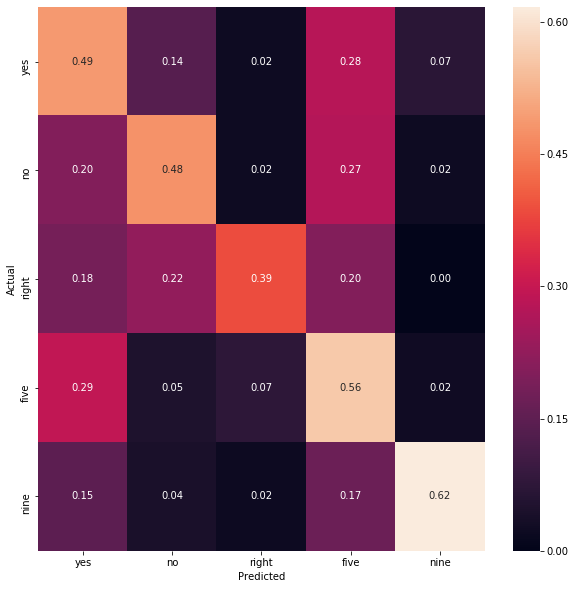

              precision    recall  f1-score   support

         0.0       0.36      0.49      0.42        43
         1.0       0.50      0.48      0.49        44
         2.0       0.76      0.39      0.51        49
         3.0       0.35      0.56      0.43        41
         4.0       0.85      0.62      0.72        47

    accuracy                           0.50       224
   macro avg       0.57      0.51      0.51       224
weighted avg       0.58      0.50      0.52       224



In [16]:
report = PIPELINE.confusion_matrix_Metrics(best_model_trained)
print(report)

## Learning Curve

/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:221: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)


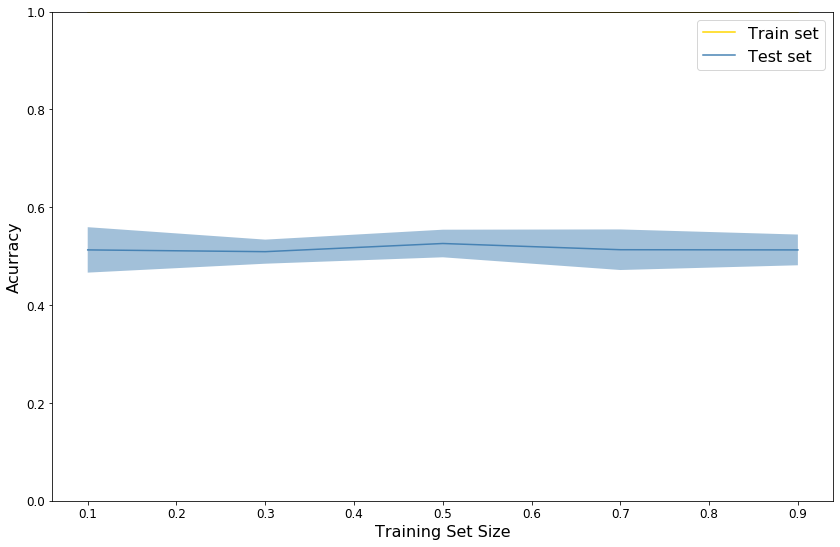

In [17]:
df_split_params = PIPELINE.learning_curve(best_model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)

In [18]:
df_split_params

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,0.1,1.0,0.512836,0.0,0.046441
1,0.3,1.0,0.509223,0.0,0.024610
2,0.5,1.0,0.525923,0.0,0.028194
3,0.7,1.0,0.513205,0.0,0.041475
4,0.9,1.0,0.512820,0.0,0.031396
